<h1 style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Estudo de caso: Evolução de efeitos especiais</h1>
<p>O número de filmes de ficcção científica aumentou ao longo dos anos?</p>
<p>A nota média dos filmes de ficção científica aumentou com o a melhoria de efeitos especiais computacionais no decorrer dos anos?</p>
<p>Quais são os 10 filmes com maior nota?</p>

<i><h1 style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Special effects evolution and Scifi movies rating</h1></i>
<i><p>Has the number of sci-fi movies increased along the years?</p></i>
<i><p>Has the average ratings of sci-fi movies got higher with the development and improvement of CGI across the years?</p></i>
<i><p>What are the top 10 highest-rated movies?</p></i>




# 1. Importando bibliotecas
# *1. Importing libraries*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('ggplot')

# 2. Importando dataframes

## *2. Importing dataframes*

## 2.1 Check e remoção de valores nulos

### *2.1  Null values check and removal*

In [5]:
movies = pd.read_csv('./movielens/movies.csv')
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.describe()
print(movies.shape)


(62423, 3)


In [7]:
movie_tags = pd.read_csv('./movielens/tags.csv')
print(movie_tags.shape)
movie_tags.head()

(1093360, 4)


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [8]:
movie_tags.describe()
print(movie_tags.isnull().any())    


userId       False
movieId      False
tag           True
timestamp    False
dtype: bool


In [9]:
movie_tags = movie_tags.dropna()
print(movie_tags.isnull().any())    

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool


In [10]:
ratings = pd.read_csv('./movielens/ratings.csv')
print(ratings.shape)
ratings.head()

(25000095, 4)


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [11]:
ratings.describe()
print(ratings.isnull().any())    

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool


In [12]:
genome_scores = pd.read_csv('./movielens/genome-scores.csv')
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


<p>Para o estudo de caso serão analisados os arquivos de filmes, tags e avaliações<p>

<i><p>For this case it will be analysed the movies, tags and ratings files<p></i>

## 2.2 Tratamento dos conjuntos de dados

### 2.2 Treating the datasets


### 2.2.1 Tratamento dos dados de filmes

<p>Considera-se um filme de ficção científica o filme que apresentar pelo menos um de seus gêneros como "sci-fi"</p>

##### *2.2.1 Organizing movie file*

<i><p> it's considered a sci-fi movie if it presents at least one of the genres sci-fi</p></i>

In [13]:
movie_genres = movies['genres'].unique()
movie_genres

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Children|Comedy|Fantasy|Mystery', 'Children|Comedy|Crime|Fantasy',
       'Comedy|Horror|Mystery|Sci-Fi|Western'], dtype=object)

In [14]:
scifi_movies = movies[movies['genres'].str.contains('Sci-Fi')]
scifi_movies.shape
scifi_movies.head()

,movieId,title,genres
23,24,Powder (1995),Drama|Sci-Fi
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
75,76,Screamers (1995),Action|Sci-Fi|Thriller


In [51]:
scifi_movies['year'] = scifi_movies['title'].str.extract('.*\\((.*)\\).*')
scifi_movies.head()

C:\Users\u125435\AppData\Local\Temp\ipykernel_23280\207150188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scifi_movies['year'] = scifi_movies['title'].str.extract('.*\\((.*)\\).*')


,movieId,title,genres,year,number of genres
23,24,Powder (1995),Drama|Sci-Fi,1995,2
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995,5
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1995,3
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,1996,3
75,76,Screamers (1995),Action|Sci-Fi|Thriller,1995,3


In [16]:
# getting the number of genres for each movie
search_string = '\|'
scifi_movies['number of genres'] = scifi_movies['genres'].str.count(search_string,re.I)+1
scifi_movies.shape

C:\Users\u125435\AppData\Local\Temp\ipykernel_23280\248679904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scifi_movies['number of genres'] = scifi_movies['genres'].str.count(search_string,re.I)+1


(3595, 5)

In [17]:
scifi_movies_Check = scifi_movies[scifi_movies['number of genres']==1]
scifi_movies_Check.head()

,movieId,title,genres,year,number of genres
2220,2311,2010: The Year We Make Contact (1984),Sci-Fi,1984,1
2435,2526,Meteor (1979),Sci-Fi,1979,1
2487,2578,"Sticky Fingers of Time, The (1997)",Sci-Fi,1997,1
2566,2658,"Flying Saucer, The (1950)",Sci-Fi,1950,1
2569,2661,It Came from Outer Space (1953),Sci-Fi,1953,1


In [18]:
scifi_movieID = scifi_movies['movieId'].unique().tolist()
len(scifi_movieID)

3595

### 2.2.2 Tratamento dos dados de tags

##### *2.2.2 Organizing tags file*

In [19]:
movie_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


<p>removendo tags não relacionadas a filmes de ficção científica</p>

<i><p>removing tags that are not related to scifi movies</p></i>

In [20]:
scifi_tags = movie_tags[movie_tags['movieId'].isin(scifi_movieID)]
scifi_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
4,4,7569,so bad it's good,1573943455
7,4,115713,artificial intelligence,1573942979
8,4,115713,philosophical,1573943033


<p>agrupando tags por movieID</p>

<i><p>grouping tags by movieID</p></i>

In [21]:
scifi_compiled_tags = scifi_tags[['movieId','tag']].groupby('movieId',as_index=False).count()
scifi_compiled_tags.head()

,movieId,tag
0,24,42
1,29,387
2,32,1485
3,66,10
4,76,52


In [22]:
movie_tags[movie_tags['movieId']==32].shape[0]

1485

### 2.2.3 Tratamento dos dados de avaliação

##### *2.2.3 Organizing rating file*


In [23]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [24]:
average_rate = ratings[['movieId','rating']].groupby('movieId',as_index=False).mean()
average_rate.head()

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434


### 2.2.4 Combinando datasets

#### 2.2.4 Merging datasets

<p>combinando tabelas de filmes e avaliações</p>
<p>merging movie and ratings tables</p>

In [25]:
merge_1 = scifi_movies.merge(average_rate,on='movieId', how='inner')

In [26]:
scifi_movie_db= merge_1.merge(scifi_compiled_tags,on='movieId', how='inner')

In [27]:
scifi_movie_db.isnull().any()

movieId             False
title               False
genres              False
year                 True
number of genres    False
rating              False
tag                 False
dtype: bool

In [28]:
print(scifi_movie_db['year'].isnull().sum().sum())

7


In [29]:
scifi_movie_db=scifi_movie_db.dropna()
scifi_movie_db
scifi_movie_db.dtypes

movieId               int64
title                object
genres               object
year                 object
number of genres      int64
rating              float64
tag                   int64
dtype: object

In [30]:
print(scifi_movie_db['year'].unique().tolist())

['1995', '1996', '1994', '1977', '1993', '1982', '1991', '1981', '1968', '1965', '1954', '1992', '1973', '1989', '1980', '1985', '1986', '1971', '1983', '1979', '1984', '1951', '1987', '1988', '1956', '1958', '1935', '1997', '1998', '1959', '1927', '1990', '1978', '1963', '1975', '1962', '1976', '1999', '1970', '1972', '1960', '1931', '1955', '1950', '1953', '1940', '2000', '1957', '1967', '1961', '1966', '1933', '2001', '1925', '2002', '1964', '1952', '2003', '1936', '1969', '2004', '1974', '1932', '1920', '2005', '2006', '1949', '1902', '2007', '1941', '2008', '1939', '2009', '1916', '1938', '1924', '2010', 'Das Millionenspiel', '1942', '1929', '2011', '1930', '2012', '1943', '1937', '1910', '2013', '1934', '2014', '2015', '2017', '2016', '2018', '2019', '1898', '1904', '1948', '1944', '1908', '1899', '1906', '1912', '1901']


In [31]:
scifi_movie_db = scifi_movie_db[scifi_movie_db['year']!= 'Das Millionenspiel']
scifi_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2807
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieId           2800 non-null   int64  
 1   title             2800 non-null   object 
 2   genres            2800 non-null   object 
 3   year              2800 non-null   object 
 4   number of genres  2800 non-null   int64  
 5   rating            2800 non-null   float64
 6   tag               2800 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 175.0+ KB


In [32]:
scifi_movie_db['year'] = scifi_movie_db['year'].astype(int)
scifi_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2807
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieId           2800 non-null   int64  
 1   title             2800 non-null   object 
 2   genres            2800 non-null   object 
 3   year              2800 non-null   int32  
 4   number of genres  2800 non-null   int64  
 5   rating            2800 non-null   float64
 6   tag               2800 non-null   int64  
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 164.1+ KB


<p> Como o escopo deste estudo  procura ver o impacto da evolução de efeitos especiais computacionais, após uma breve pesquisa no IMDB, confirmou-se que o primeiro filme com efeitos especiais computacionais chama-se Westworld (1973). Portanto, todos os filmes anteriores a esse ano serão desconsiderados</p>

<i><p>As the scope of study aims to see the impact of CGI evolution on Sci fi production, after a quick reasearch it was confirmed that the first sci-fi movie to make use of CGI was called Westworld (1973). Therefore, all movies before this year will be removed from the dataset</p></i>

In [33]:
scifi_movie_db=scifi_movie_db[(scifi_movie_db['year']>=1973)]

<p> Analisando a nota de "Westworld", primeiro filme a usar efeitos especiais de computador</p>

<p> Analyzing 'Westworld' rating - first movie that made use of CGI</p>

In [34]:
westworld_rate = scifi_movie_db[scifi_movie_db['title'].str.contains("Westworld")]
westworld_rate

,movieId,title,genres,year,number of genres,rating,tag
160,2527,Westworld (1973),Action|Sci-Fi|Thriller|Western,1973,4,3.402909,110


In [35]:
number_of_films = scifi_movie_db[['year','movieId']].groupby('year',as_index=False).count()
number_of_films.sort_values(by=['year']).head(5)

,year,movieId
0,1973,32
1,1974,15
2,1975,17
3,1976,11
4,1977,21


In [36]:
movie_tags['parsed_time'] = pd.to_datetime(movie_tags['timestamp'], unit='s')
movie_tags.head()
print(movie_tags['parsed_time'].max())

2019-11-21 06:11:36


<p> O último registro de tags de filme foi em novembro de 2019,o que indica que esse ano está incompleto e, portanto, seá removido da análise</p>
<p> The last timestamp is from november 2019, meaning that the dataset for this year is not complete, therefore this year will be not taken into account</p>

In [37]:
scifi_movie_db=scifi_movie_db[(scifi_movie_db['year']<=2018)]
number_of_films = scifi_movie_db[['year','movieId']].groupby('year',as_index=False).count()
number_of_films.sort_values(by=['year']).head(5)

,year,movieId
0,1973,32
1,1974,15
2,1975,17
3,1976,11
4,1977,21


# 3. Visualização dos dados
## *3. Data Visualization*

<bound method _AxesBase.set_xlabel of <AxesSubplot:title={'center':'Growth of Sci-fi productions since the first movie that made use of CGI'}, xlabel='year', ylabel='# of sci-fi movies'>>

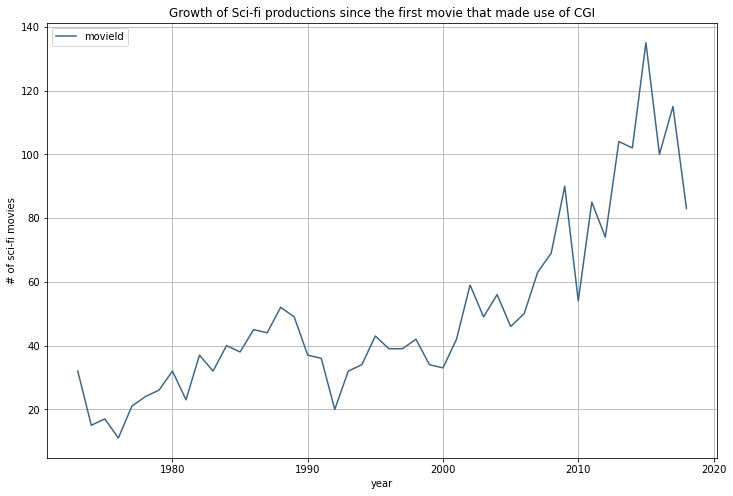

In [46]:
%matplotlib inline
line = number_of_films.plot(x='year',y='movieId',color='#3f6685',figsize=(12,8), grid=True)
plt.title('Growth of Sci-fi productions since the first movie that made use of CGI',)
plt.ylabel('# of sci-fi movies')
line.set_xlabel

2.806270946554637


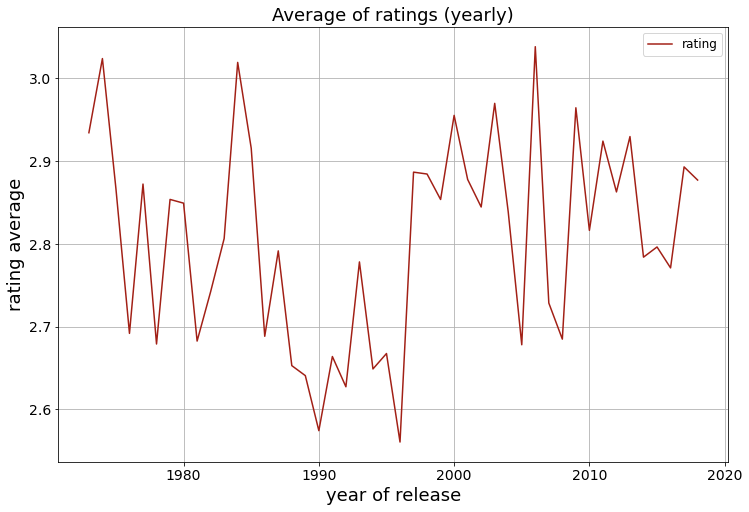

In [47]:

average_year_rate= scifi_movie_db[['year','rating']].groupby('year',as_index=False).mean()
line = average_year_rate.plot(x='year',y='rating',color='#a22016',figsize=(12,8), grid=True)
plt.title('Average of ratings (yearly)',fontsize=18)
plt.ylabel('rating average',fontsize=18)
plt.xlabel('year of release',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
line.set_xlabel
global_average=average_year_rate['rating'].mean()
#calculating global average
print(global_average)

<p>Usando gráfico de dispersão para verificar se há alguma correlação entre média de avaliação e ano de lançamento</p>

<i><p>Using a scatterplot to check for correlation between rating average and year of release</p></i>

No handles with labels found to put in legend.


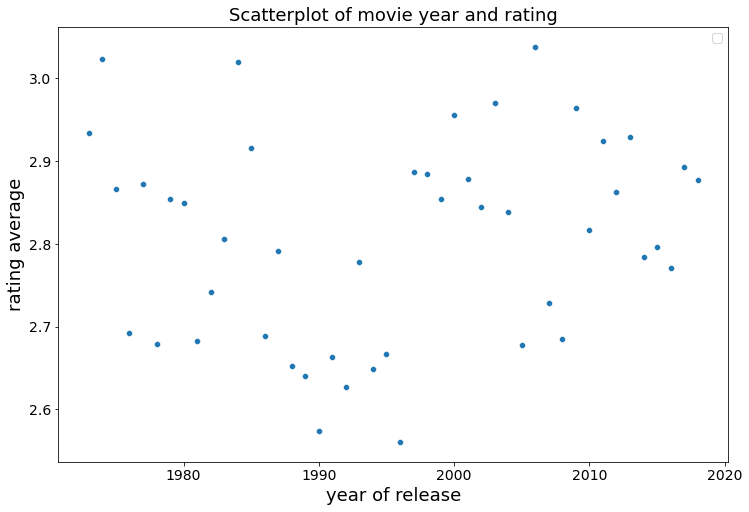

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=average_year_rate,y='rating',x='year')
plt.title('Scatterplot of movie year and rating',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('rating average',fontsize=18)
plt.xlabel('year of release',fontsize=18)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)


<p>Como não houve correlação entre avaliação média e ano de lançamento do filme, será verificado se há correlação entre as demais informações dos filmes. No lugar da coluna gênero que contém a informação de quais gêneros  um filme pertence (categórico) será usado a quantidade de gêneros que um filme possui (numérico)</p>
<i><p>Since there was no correlation regarding year of the movie and ratings, we will check for correlation among other information. However, the fields movieID and genre will not be used as they are identifiers and categorical information, respectively. Genre will be evaluated by the field # of genres</p> </i>


Text(0.5, 1.0, 'Heatmap - correlation between analysed columns')

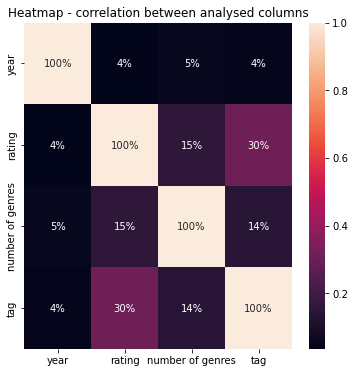

In [49]:
plt.figure(figsize=(6,6))
sns.heatmap(scifi_movie_db[['year','rating','number of genres','tag']].corr(), annot=True, fmt='.0%')
plt.title('Heatmap - correlation between analysed columns')


No handles with labels found to put in legend.


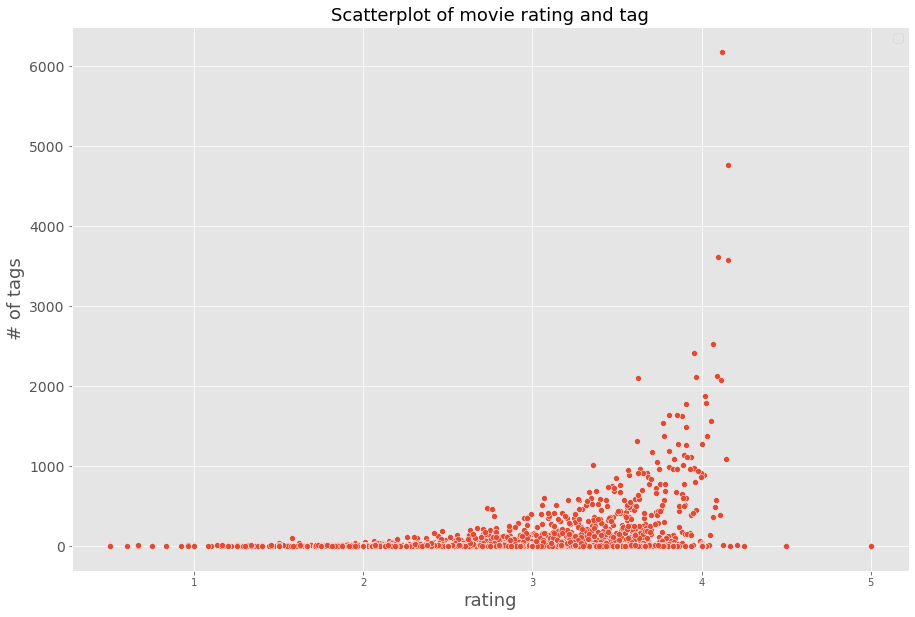

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=scifi_movie_db,y='tag',x='rating')
plt.title('Scatterplot of movie rating and tag',fontsize=18)
plt.ylabel('# of tags',fontsize=18)
plt.xlabel('rating',fontsize=18)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)


<p>O gráfico de dispersão mostra uma correlação entre avaliação e número de tags, portanto número de tags será utilizada para elencar os melhores filmes.</p>

<i><p>The scatterplot shows a correlation between rating and number of tags, therefore it will be used to sort the rank of best movies.</p></i>

In [50]:
top_10_scifi=scifi_movie_db.sort_values(by=['tag'],ascending=False)[:10]
top_10_scifi.head()

,movieId,title,genres,year,number of genres,rating,tag
13,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1977,3,4.120189,6180
959,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,2010,7,4.155508,4767
1272,109487,Interstellar (2014),Sci-Fi|IMAX,2014,2,4.097928,3616
170,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999,3,4.154099,3573
529,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,2004,3,4.066351,2533


Text(0.5, 0, 'movie name')

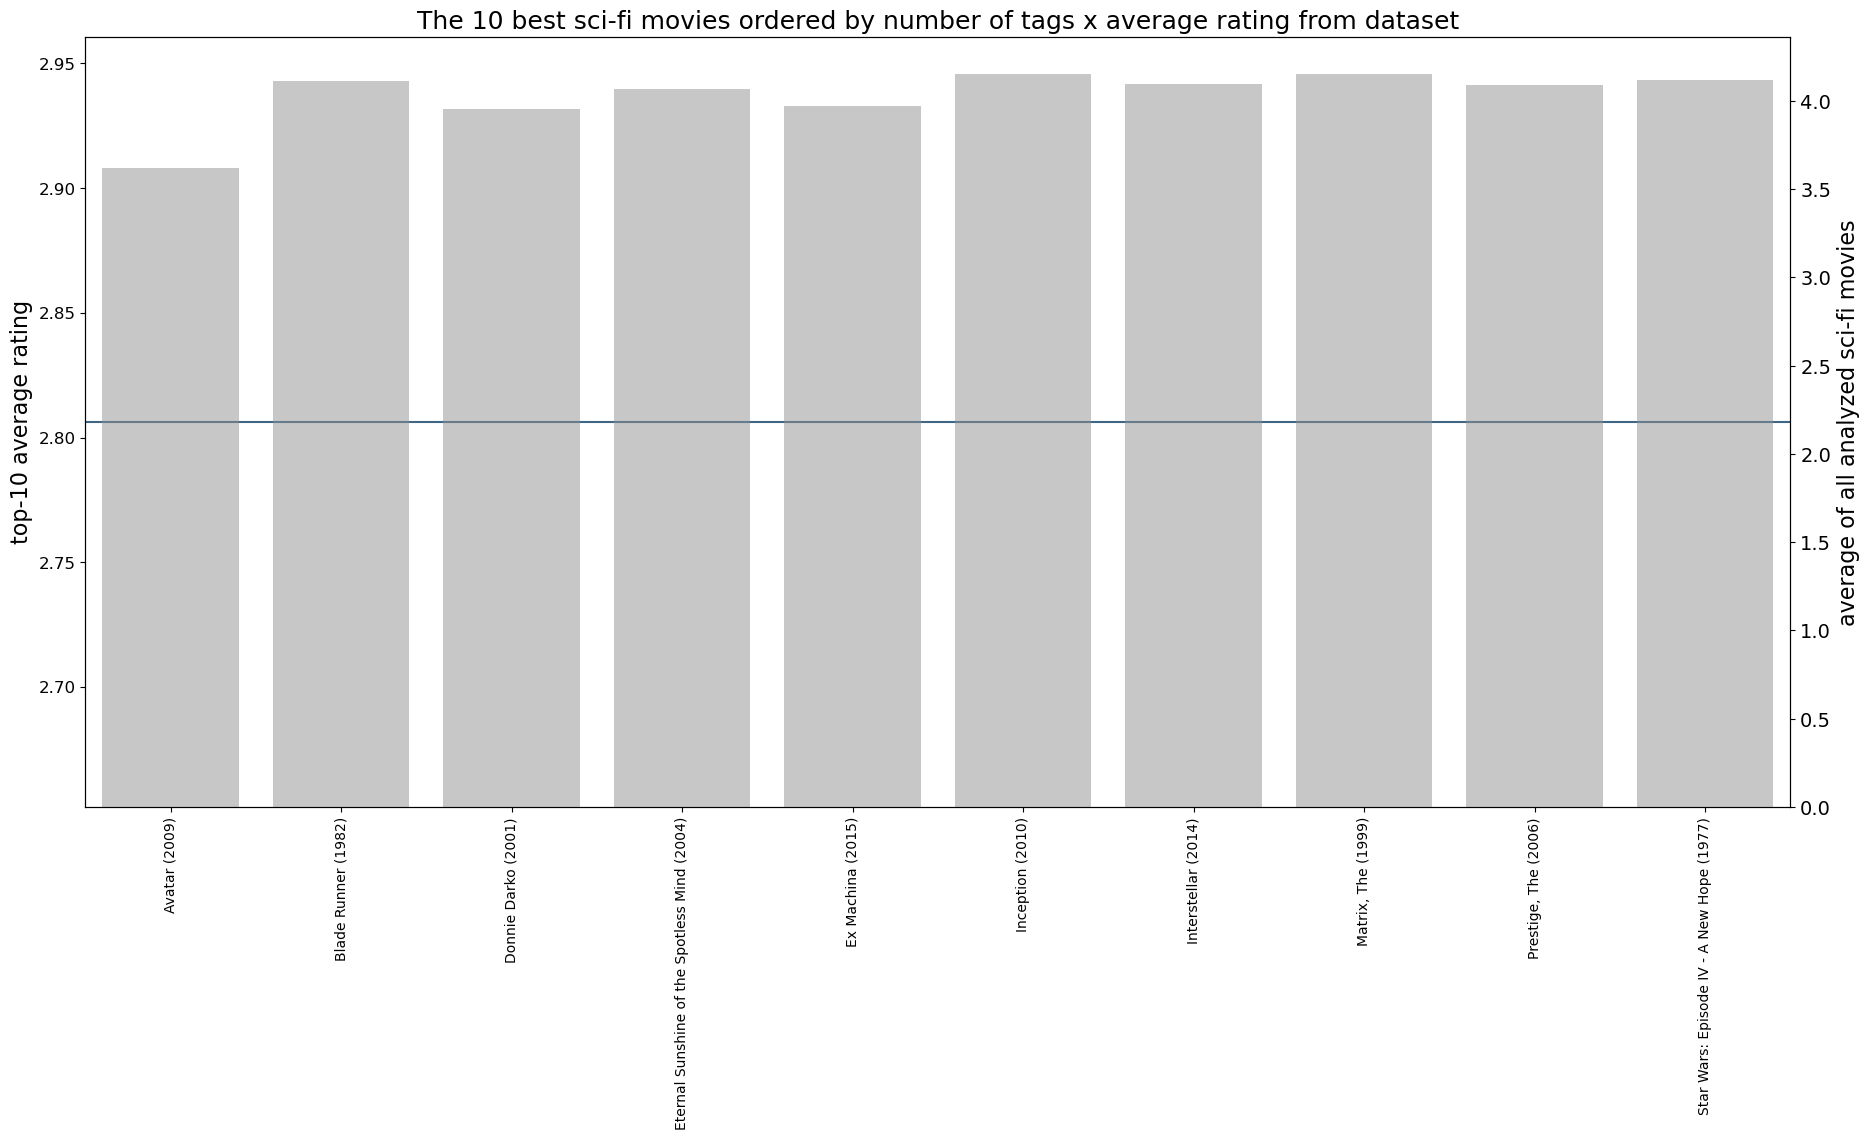

In [45]:
average_year_rate= top_10_scifi[['title','rating']].groupby('title',as_index=False).mean()
fig, ax1 = plt.subplots(figsize=(22,10))
plt.style.use('default')
plt.axhline(y=global_average,color='#3f6685',label='global average')
plt.ylabel('top-10 average rating',fontsize=16)
plt.yticks(fontsize=12)
ax2=ax1.twinx()
sns.barplot(data=average_year_rate,x='title',y='rating',color='#909090',alpha=0.5,ax=ax2)
ax1.tick_params(axis='x', rotation=90)
plt.yticks(fontsize=12)
plt.yticks(fontsize=14)
plt.ylabel('average of all analyzed sci-fi movies',fontsize=16)
plt.title("The 10 best sci-fi movies ordered by number of tags x average rating from dataset",fontsize=18)
plt.xlabel('movie name',fontsize=16)

# 4. Conclusão

<p>O objetivo desse estudo de caso era explorar diferentes tabelas de um dataset, analisando-as, limpando-as e combinando as informações relevantes, além de utilizar diferentes tipos de gráficos para responder a três perguntas</p>

<p>O número de filmes de ficcção científica aumentou ao longo dos anos?</p>
<p>A nota média dos filmes de ficção científica aumentou com o a melhoria de efeitos especiais computacionais?</p>
<p>Quais são os 10 filmes com maior nota?</p>

<p>A análise exploratória de dados (EDA) mostrou um aumento no número de filmes de ficção científica lançados ao ano. Além disso, os gráficos de dispersão e o mapa de calor reveram a importância de considerar o número de tags para elencar os filmes com melhor avaliação, ou seja, levar em consideração apenas a nota, levaria a uma intepretação incorreta dos dados, já que há filmes com nota máxima e mínima com apenas uma tag de avaliação, ou seja, baixa relevância estatística.<p> 

<p> Em relação às notas, a média de todo período analisado foi de 2.8, porém o gráfico de dispersão não mostrou um aumento na média notas no decorrer do tempo </p>

<p>Dos dez primeiros colocados, apenas dois filmes (Ex Machina e Interestelar) são da última década. A presença de filmes como Star Wars (1977), lançado apenas quatro anos após Waterworld - o primeiro filme a usar CGI - ainda se destaca no ranking e sugere que existem outros fatores mais importantes do que efeitos especiais que influenciam a na valiação de um filme de ficção científica.</p> 


## *4. Conclusion*
<i>
<p>The goal of this case study was to explore different tables within a dataset, analyzing them, cleaning them, and combining relevant information, as well as using different types of graphs to answer three questions:</p>

<p>Has the number of science fiction movies increased over the years?</p>
<p>Has the average rating of science fiction movies increased with the improvement of computer-generated special effects?</p>
<p>What are the top 10 highest-rated movies?</p>
<p>The exploratory data analysis (EDA) showed an increase in the number of science fiction movies released each year. Additionally, scatter plots and heatmaps revealed the importance of considering the number of tags to list the movies with the best ratings. That is, considering only the rating would lead to an incorrect interpretation of the data, as there are movies with maximum and minimum ratings with only one rating tag, indicating low statistical relevance.</p>

<p>Regarding the ratings, the average for the entire period analyzed was 2.8, but the scatter plot did not show an increase in the average ratings over time.</p>

Of the top ten highest-rated movies, only two (Ex Machina and Interstellar) are from the last decade. The presence of movies like Star Wars (1977), released just four years after Waterworld - the first movie to use CGI - still stands out in the rankings and suggests that there are other factors more important than special effects that influence the rating of a science fiction movie.</p>

</i>